# About

A stand-alone script to show how the synchrony of a delayed Kuramoto oscillator network is affected by parameters $g$, $\tau^0$. Specifically, the number of possible synchronous states and their respective stabilities. Notable things are parameter values at which there exist no stable synchronous state, and whether the synchronous frequency is higher or lower than the natural frequency.

## Captions:

### Figure 1:
 - There exists multiple (stable) synchronous states for these parameters. In reference to the exponential equation in Strogatz proof, we plot the eigenvalues using the LambertW. We see that the eigenvalues cross over the imaginary axis for the unstable state corresponding to $\cos(-\Omega \tau^0) < 0$.

### Figure 2:
 - With respect to some moderate $\tau^0$ and increasing $g$, multiple synchronous states can arise. Some branches of higher frequency states can be stable, and have a significantly higher frequency than the natural frequency.
 - With respect to some small $g$ and increasing $\tau^0$, the system can lose its synchrony due to a loss of stable synchronous states when $\tau^0$ becomes critically large.

# Library

In [1]:
from __future__ import division, print_function

%matplotlib inline
# Toggle on/off
# %matplotlib notebook

import os
import numpy as np
import scipy.io as sio
from scipy import optimize
from scipy import special
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.transforms as tsfm
import math
from math import pi

from lib import *

from IPython.display import clear_output

# Figure 1: Eigenvalues

## Parameters

In [2]:
# Fixed parameters
w0 = 1.0
g = 1.5
tau0 = 2.0

shift = 1.5

## Errors and synchronous states

In [3]:
Omega_arr = np.linspace(w0-g, w0+shift*g, num=400)
err_arr = Omega_arr - w0 - g*np.sin(-Omega_arr*tau0)

# Find roots
Omegafun = lambda Omega: Omega - w0 - g*np.sin(-Omega*tau0)
eqOmegas = rootlib.root_on_interval(Omegafun, w0-g, w0+g, steps=100)

# Stabilities
eqStabs = np.cos(-eqOmegas*tau0)

# Eigenvalues at two stability points
Omega1 = eqOmegas[0]
Omega2 = eqOmegas[1]
Omega3 = eqOmegas[2]

a1 = -g*np.cos(-Omega1*tau0)
b1 = g*np.cos(-Omega1*tau0)
c1 = -tau0

a2 = -g*np.cos(-Omega2*tau0)
b2 = g*np.cos(-Omega2*tau0)
c2 = -tau0

a3 = -g*np.cos(-Omega3*tau0)
b3 = g*np.cos(-Omega3*tau0)
c3 = -tau0

maxK = 10
indsBranch = np.arange(-maxK, maxK+1)
eigs1 = np.zeros(indsBranch.size, dtype='complex64')
eigs2 = np.zeros(indsBranch.size, dtype='complex64')
eigs3 = np.zeros(indsBranch.size, dtype='complex64')

for i in range(indsBranch.size):
    k = indsBranch[i]
    eigs1[i] = a1 - special.lambertw(-b1*c1*np.exp(a1*c1), k=k) / c1
    eigs2[i] = a2 - special.lambertw(-b2*c2*np.exp(a2*c2), k=k) / c2
    eigs3[i] = a3 - special.lambertw(-b3*c3*np.exp(a3*c3), k=k) / c3

## Plot options

In [4]:
# Plot positions [left, bottom, width, height]
bbox0 = [0.10, 0.60, 0.25, 0.40] # Top left (error plot)
bbox1 = [0.10, 0.10, 0.25, 0.40] # Bottom left (stability of roots)
bbox2 = [0.45, 0.10, 0.15, 0.90] # Right eig plot 1
bbox3 = [0.65, 0.10, 0.15, 0.90] # Right eig plot 2
bbox4 = [0.85, 0.10, 0.15, 0.90] # Right eig plot 3

# Lines
col_hline1 = 'black'
col_hline2 = 'red'
lw_hline = 0.7
col_vline = 'green'
lw_vline = 1.0
col_curve = 'black'
lw_curve = 1.5

# Markers
col_m1 = 'blue'
mark_m1 = 'd'
s_m1 = 60

## Generate figure 1

(-4, 4)

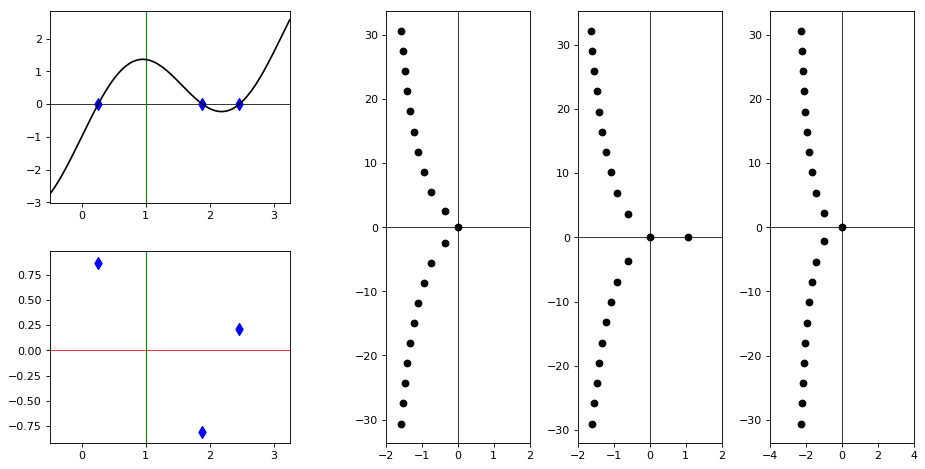

In [5]:
fig, ax = plt.subplots(5, figsize=(12,6), dpi=80)

# Set positions
ax[0].set_position(bbox0)
ax[1].set_position(bbox1)
ax[2].set_position(bbox2)
ax[3].set_position(bbox3)
ax[4].set_position(bbox4)

# Plot arrays
ax[0].plot(Omega_arr, err_arr, color=col_curve, linewidth=lw_curve, zorder=2)
ax[0].scatter(eqOmegas, np.zeros(eqOmegas.shape), color=col_m1, marker=mark_m1, s=s_m1, zorder=2)
ax[1].scatter(eqOmegas, eqStabs, color=col_m1, marker=mark_m1, s=s_m1, zorder=2)

ax[2].scatter(eigs1.real, eigs1.imag, color='black', zorder=2)
ax[3].scatter(eigs2.real, eigs2.imag, color='black', zorder=2)
ax[4].scatter(eigs3.real, eigs3.imag, color='black', zorder=2)

# Axis lines
ax[0].axhline(y=0, color=col_hline1, linewidth=lw_hline, zorder=0)
ax[1].axhline(y=0, color=col_hline2, linewidth=lw_hline, zorder=0)
ax[2].axhline(y=0, color=col_hline1, linewidth=lw_hline, zorder=0)
ax[3].axhline(y=0, color=col_hline1, linewidth=lw_hline, zorder=0)
ax[4].axhline(y=0, color=col_hline1, linewidth=lw_hline, zorder=0)

ax[0].axvline(x=w0, color=col_vline, linewidth=lw_vline, zorder=0)
ax[1].axvline(x=w0, color=col_vline, linewidth=lw_vline, zorder=0)
ax[2].axvline(x=0, color=col_hline1, linewidth=lw_hline, zorder=0)
ax[3].axvline(x=0, color=col_hline1, linewidth=lw_hline, zorder=0)
ax[4].axvline(x=0, color=col_hline1, linewidth=lw_hline, zorder=0)

# Plot limits
ax[0].set_xlim(left=w0-g, right=w0+shift*g)
ax[1].set_xlim(left=w0-g, right=w0+shift*g)
ax[2].set_xlim(left=-2, right=2)
ax[3].set_xlim(left=-2, right=2)
ax[4].set_xlim(left=-4, right=4)

## Statistics

# Figure 2: Synchronous frequencies and stability

## Parameters

In [6]:
# Fixed parameters
w0 = 1.0

# Plot 1: Fixed g and varying tau0
arr_tau0 = np.linspace(0, 8, 25)
g = 0.15

# Plot 2: Fixed tau0 and varying g
arr_g = np.linspace(0, 3, 20)
tau0 = 2.0

## Synchronous states

In [7]:
# Plot 1 arrays
Omega_arr1 = np.empty((arr_tau0.size, 30)) # Padded
Omega_arr1[:] = np.nan

Stab_arr1 = Omega_arr1.copy()

maxRootCount = 0
    
for k in range(arr_tau0.size):
    
    tauk = arr_tau0[k]
    
    # Error function
    Omegafun = lambda Omega: w0 + g*np.sin(-Omega*tauk) - Omega
    
    # Obtain array of roots
    Omegaroots = rootlib.root_on_interval(Omegafun, w0-g, w0+g, steps=100)
    
    # Sort Omegaroots from smallest to largest
    Omegaroots = np.sort(Omegaroots)
    
    # Add to Omega array
    Omega_arr1[k,:Omegaroots.size] = Omegaroots
    
    # Get maximum number of roots
    maxRootCount = max(maxRootCount, Omegaroots.size)
    
    # Apply stability criterion
    Stabroots = np.cos(-Omegaroots*tauk)
    Stab_arr1[k, :Stabroots.size] = Stabroots
    
# Remove padding
Omega_arr1 = Omega_arr1[:,:maxRootCount]
Stab_arr1 = Stab_arr1[:,:maxRootCount]

In [8]:
# Plot 2 arrays
Omega_arr2 = np.empty((arr_g.size, 30)) # Padded
Omega_arr2[:] = np.nan

Stab_arr2 = Omega_arr2.copy()

maxRootCount = 0

# g = 0
Omega_arr2[0,0] = w0
Stab_arr2[0,0] = np.cos(w0*tau0)

for k in range(1,arr_g.size):
    
    g_k = arr_g[k]
    
    # Error function
    Omegafun = lambda Omega: w0 + g_k*np.sin(-Omega*tau0) - Omega
    
    # Obtain array of roots
    Omegaroots = rootlib.root_on_interval(Omegafun, w0-g_k, w0+g_k, steps=100)
    
    # Sort Omegaroots from smallest to largest
    Omegaroots = np.sort(Omegaroots)
    
    # Add to Omega array
    Omega_arr2[k,:Omegaroots.size] = Omegaroots
    
    # Get maximum number of roots
    maxRootCount = max(maxRootCount, Omegaroots.size)
    
    # Apply stability criterion
    Stabroots = np.cos(-Omegaroots*tau0)
    Stab_arr2[k, :Stabroots.size] = Stabroots
    
# Remove padding
Omega_arr2 = Omega_arr2[:,:maxRootCount]
Stab_arr2 = Stab_arr2[:,:maxRootCount]

## Plot options

In [9]:
# Plot positions [left, bottom, width, height]
bbox0 = [0.10, 0.60, 0.40, 0.40] # Top left (sync freqs, vary g)
bbox1 = [0.60, 0.60, 0.40, 0.40] # Top right (sync stabs, vary g)
bbox2 = [0.10, 0.10, 0.40, 0.40] # Bottom left (sync freqs, vary tau0)
bbox3 = [0.60, 0.10, 0.40, 0.40] # Bottom right (sync stabs, vary tau0)

## Generate figure

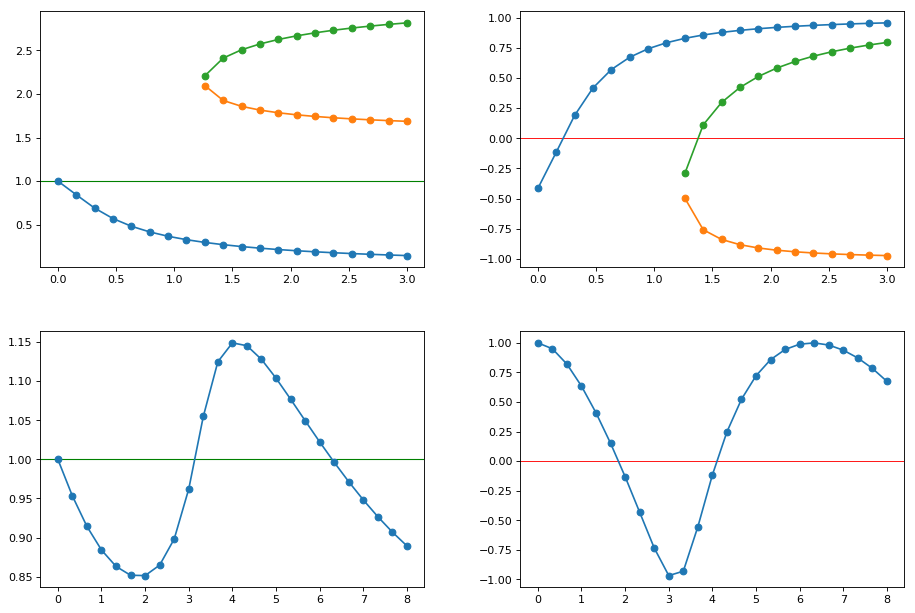

In [10]:
fig, ax = plt.subplots(4, figsize=(12,8), dpi=80)

# Set positions
ax[0].set_position(bbox0)
ax[1].set_position(bbox1)
ax[2].set_position(bbox2)
ax[3].set_position(bbox3)

# Plots
ax[0].plot(arr_g, Omega_arr2, marker='o', zorder=2)
ax[1].plot(arr_g, Stab_arr2, marker='o', zorder=2)
ax[2].plot(arr_tau0, Omega_arr1, marker='o', zorder=2)
ax[3].plot(arr_tau0, Stab_arr1, marker='o', zorder=2)

# Axis lines
ax[0].axhline(y=w0, color='green', linewidth=1.0, zorder=0)
ax[2].axhline(y=w0, color='green', linewidth=1.0, zorder=0)

ax[1].axhline(y=0, color='red', linewidth=0.8, zorder=0)
ax[3].axhline(y=0, color='red', linewidth=0.8, zorder=0)

## Statistics

In [11]:
print(arr_g)
print(Omega_arr2)

[0.         0.15789474 0.31578947 0.47368421 0.63157895 0.78947368
 0.94736842 1.10526316 1.26315789 1.42105263 1.57894737 1.73684211
 1.89473684 2.05263158 2.21052632 2.36842105 2.52631579 2.68421053
 2.84210526 3.        ]
[[1.                nan        nan]
 [0.84315761        nan        nan]
 [0.6899473         nan        nan]
 [0.56970961        nan        nan]
 [0.48151831        nan        nan]
 [0.41617361        nan        nan]
 [0.36633962        nan        nan]
 [0.32721626        nan        nan]
 [0.29571918 2.09620171 2.20830778]
 [0.26982132 1.92536924 2.41216004]
 [0.24814852 1.85805992 2.50734673]
 [0.22974039 1.8150188  2.57426051]
 [0.21390683 1.78413554 2.62583405]
 [0.20013964 1.76059483 2.66749201]
 [0.18805642 1.74193783 2.70215459]
 [0.17736395 1.72673345 2.73160885]
 [0.1678336  1.714077   2.75703872]
 [0.15928443 1.70336251 2.77927247]
 [0.1515714  1.69416615 2.79891319]
 [0.1445768  1.68618128 2.81641373]]
